In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Задание 1

In [2]:
def read_covid_dataset(path_to_csv):
    
    covid_db = pd.read_csv(path_to_csv)
    
    return covid_db, None


def read_hr_dataset(path_to_csv):
    
    hr_db = pd.read_csv(path_to_csv)
    
    return hr_db.drop('target', axis=1), hr_db['target']

In [3]:
СOVID_DATA_PATH = 'covid.csv'
HR_DATA_PATH = 'hr.csv'

In [4]:
X_covid, _ = read_covid_dataset(СOVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

In [5]:
X_covid, X_hr, y_hr

(      country iso_code        date  total_vaccinations  people_vaccinated  \
 0     Algeria      DZA  2021-01-29                 0.0                NaN   
 1     Algeria      DZA  2021-01-30                30.0                NaN   
 2     Andorra      AND  2021-01-25               576.0              576.0   
 3     Andorra      AND  2021-01-26                 NaN                NaN   
 4     Andorra      AND  2021-01-27                 NaN                NaN   
 ...       ...      ...         ...                 ...                ...   
 2413    Wales      NaN  2021-02-01            440706.0           439640.0   
 2414    Wales      NaN  2021-02-02            463657.0           462497.0   
 2415    Wales      NaN  2021-02-03            491786.0           490570.0   
 2416    Wales      NaN  2021-02-04            524677.0           523042.0   
 2417    Wales      NaN  2021-02-05            559468.0           556997.0   
 
       people_fully_vaccinated  daily_vaccinations_raw  daily_

## Задание 2

### 2.1

In [6]:
def build_distr(db):
    
    numerical = [
        'city_development_index',
        'training_hours']
    
    categorical = ['gender',
                   'relevent_experience',
                   'enrolled_university',
                   'education_level',
                   'major_discipline', 
                   'experience', 
                   'company_size', 
                   'company_type',
                   'last_new_job']
    
    print('NUMERICAL')
    
    for column in numerical:
        
        plt.hist(db[column])
        plt.title(column)
        plt.show()
    
    print('CATEGORICAL\n')
    
    distr_dict = {}
    
    for column in categorical:
        distr_dict[column] = {}
        
        for i in db[column]:
            if i in distr_dict[column]:
                distr_dict[column][i] += 1
            else:
                distr_dict[column][i] = 1
                
    for category in distr_dict:
        print(category, distr_dict[category], '\n')

NUMERICAL


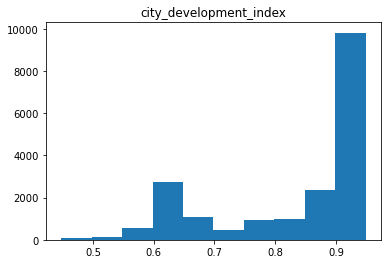

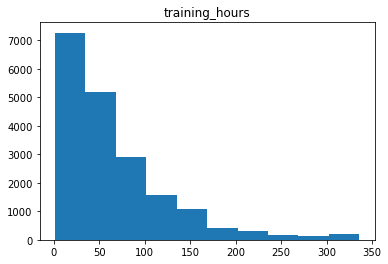

CATEGORICAL

gender {'Male': 13221, nan: 4508, 'Female': 1238, 'Other': 191} 

relevent_experience {'Has relevent experience': 13792, 'No relevent experience': 5366} 

enrolled_university {'no_enrollment': 13817, 'Full time course': 3757, nan: 386, 'Part time course': 1198} 

education_level {'Graduate': 11598, 'Masters': 4361, 'High School': 2017, nan: 460, 'Phd': 414, 'Primary School': 308} 

major_discipline {'STEM': 14492, 'Business Degree': 327, nan: 2813, 'Arts': 253, 'Humanities': 669, 'No Major': 223, 'Other': 381} 

experience {'>20': 3286, '15': 686, '5': 1430, '<1': 522, '11': 664, '13': 399, '7': 1028, '17': 342, '2': 1127, '16': 508, '1': 549, '4': 1403, '10': 985, '14': 586, '18': 280, '19': 304, '12': 494, '3': 1354, '6': 1216, '9': 980, '8': 802, '20': 148, nan: 65} 

company_size {nan: 5938, '50-99': 3083, '<10': 1308, '10000+': 2019, '5000-9999': 563, '1000-4999': 1328, '10/49': 1471, '100-500': 2571, '500-999': 877} 

company_type {nan: 6140, 'Pvt Ltd': 9817, 'Funded

In [7]:
build_distr(X_hr)

### 2.2

In [8]:
print(f'Исходный размер датасета hr {len(X_hr)}')

Исходный размер датасета hr 19158


In [9]:
X_hr_dropna = X_hr.dropna()

In [10]:
print(f'Pазмер датасета hr без NaN {len(X_hr_dropna)}')

Pазмер датасета hr без NaN 8955


NUMERICAL


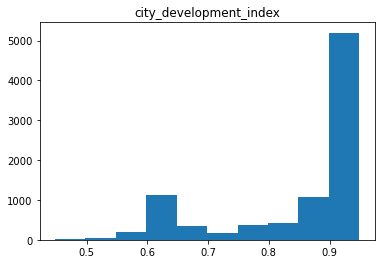

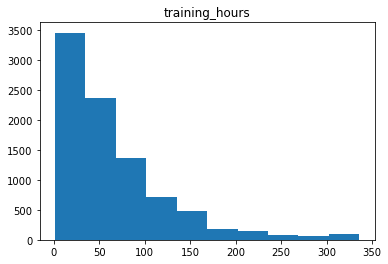

CATEGORICAL

gender {'Male': 8073, 'Female': 804, 'Other': 78} 

relevent_experience {'No relevent experience': 1104, 'Has relevent experience': 7851} 

enrolled_university {'no_enrollment': 7594, 'Part time course': 529, 'Full time course': 832} 

education_level {'Graduate': 6252, 'Masters': 2449, 'Phd': 254} 

major_discipline {'STEM': 7989, 'Humanities': 378, 'Business Degree': 170, 'Other': 177, 'No Major': 112, 'Arts': 129} 

experience {'15': 398, '>20': 1881, '13': 235, '7': 485, '5': 575, '16': 304, '11': 372, '<1': 97, '18': 168, '19': 179, '12': 293, '10': 551, '9': 533, '2': 297, '6': 535, '4': 480, '14': 333, '3': 428, '8': 398, '17': 206, '20': 86, '1': 121} 

company_size {'50-99': 1986, '<10': 840, '5000-9999': 393, '1000-4999': 930, '10/49': 951, '100-500': 1814, '10000+': 1449, '500-999': 592} 

company_type {'Pvt Ltd': 6794, 'Funded Startup': 784, 'Early Stage Startup': 385, 'Public Sector': 564, 'NGO': 356, 'Other': 72} 

last_new_job {'>4': 1965, '4': 599, '1': 383

In [11]:
build_distr(X_hr_dropna)

Датасет уменьшился в 2.14 раза, отношение людей с релевантным опытом к людям без опыта увеличилось в 2.77 раз. Не осталось людей из 'High school' или 'Primary school'. Остальные признаки изменились не так сильно.

### 2.3

Для числовых признаков отсутствуют NaN значения.

### 2.4

In [12]:
def fill_na(X, y):
    
    most_common_values = {'gender': 'Male',                      # Замена NaN на наиболее частые значения
              'enrolled_university' : 'no_enrollment',
              'education_level' : 'Graduate',
              'major_discipline': 'STEM',
              'experience' : '>20',
              'company_size': '50-99',
              'company_type': 'Pvt Ltd',
              'last_new_job' : '1'}
    
    X_fill = X.fillna(value=most_common_values)
    
    y_fill = y_hr # отсутствуют NaN среди меток y_hr
    
    return X_fill, y_hr

In [13]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

### 2.5

NUMERICAL


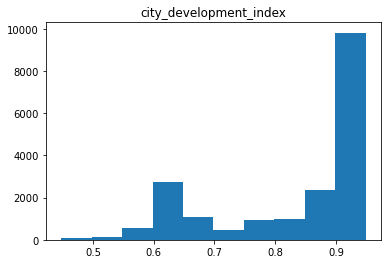

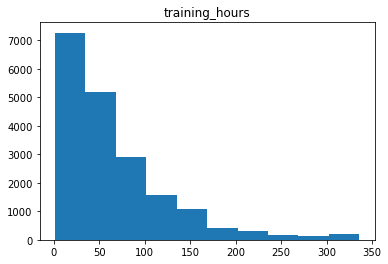

CATEGORICAL

gender {'Male': 17729, 'Female': 1238, 'Other': 191} 

relevent_experience {'Has relevent experience': 13792, 'No relevent experience': 5366} 

enrolled_university {'no_enrollment': 14203, 'Full time course': 3757, 'Part time course': 1198} 

education_level {'Graduate': 12058, 'Masters': 4361, 'High School': 2017, 'Phd': 414, 'Primary School': 308} 

major_discipline {'STEM': 17305, 'Business Degree': 327, 'Arts': 253, 'Humanities': 669, 'No Major': 223, 'Other': 381} 

experience {'>20': 3351, '15': 686, '5': 1430, '<1': 522, '11': 664, '13': 399, '7': 1028, '17': 342, '2': 1127, '16': 508, '1': 549, '4': 1403, '10': 985, '14': 586, '18': 280, '19': 304, '12': 494, '3': 1354, '6': 1216, '9': 980, '8': 802, '20': 148} 

company_size {'50-99': 9021, '<10': 1308, '10000+': 2019, '5000-9999': 563, '1000-4999': 1328, '10/49': 1471, '100-500': 2571, '500-999': 877} 

company_type {'Pvt Ltd': 15957, 'Funded Startup': 1001, 'Early Stage Startup': 603, 'Other': 121, 'Public Secto

In [14]:
build_distr(X_hr_fill)

Мы избавились от значений NaN, не вводя дополнительных признаков и сохранив размер датасета. При этом NaN в категориальных признаках были заменены самыми часто встречающимися. Относительное распределение заметно изменилось только для признаков 'company_size' и 'company_type', которые изначально имели наибольший процент NaN. 

## Задание 3

Искомая страна - Bahrain


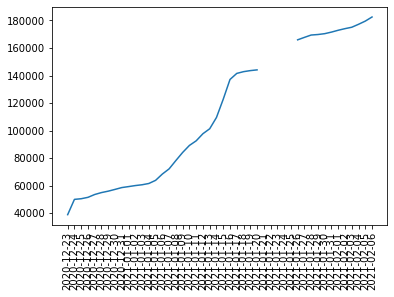

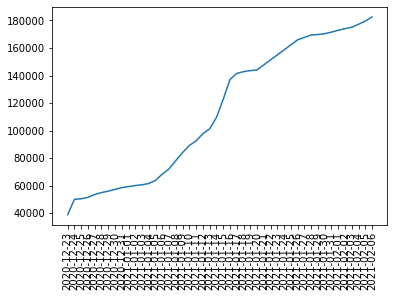

In [15]:
country_date_dict = {}

for i in range(len(X_covid)):
    if X_covid['country'][i] not in country_date_dict:
        country_date_dict[X_covid['country'][i]] = 1
    else:
        country_date_dict[X_covid['country'][i]] += 1
        
for el in country_date_dict:
    if country_date_dict[el] == 46:
        cntr_46 = el
        print('Искомая страна - ' + cntr_46)

X, Y = [], []

for i in range(len(X_covid)):
    if X_covid['country'][i] == cntr_46:
        X.append(X_covid['date'][i])
        Y.append(X_covid['total_vaccinations'][i])
        
plt.plot(X, Y)
plt.xticks(rotation=90)
plt.show()


for i in range(46):
    if str(Y[i]) == 'nan':
        if str(Y[i-1]) != 'nan':
            start_ind = i-1
        if str(Y[i+1]) != 'nan':
            end_ind = i+1
             
delta = (Y[end_ind] - Y[start_ind])/(end_ind-start_ind)

for i in range(start_ind+1, end_ind):
    Y[i] = Y[i-1] + delta
    
    
plt.plot(X, Y)
plt.xticks(rotation=90)
plt.show()

Исходя из вида первого графика, пробел в данных заполнен линейной зависимостью

## Задание 4

Визуально, исходя из вида распределений, они выглядят осмысленно и выбросы не обнаруживаются.

## Задание 5

In [16]:
def encode(X):
    column_for_OHE = ['gender', 
                      'relevent_experience', 
                      'enrolled_university', 
                      'major_discipline', 
                      'company_type']
    
    column_for_label = ['city', 
                        'education_level', 
                        'experience', 
                        'company_size', 
                        'last_new_job']
    
    feature_dict = {}
    
    len_X = len(X['gender'])
    
    for column in (column_for_OHE+column_for_label):
        feature_dict[column] = []
        for i in range(len_X):
            if X[column][i] in feature_dict[column]:
                continue
            else:
                feature_dict[column].append(X[column][i])
            
    ### OneHotEncoding
    
    for column in column_for_OHE:
        d = {feature_dict[column][i] : [] for i in range(len(feature_dict[column]))}
        for i in range(len_X):
            for key in d.keys():
                if X[column][i] == key:
                    d[key].append(1)
                else:
                    d[key].append(0)
        if 'OHE_columns' in locals():
            OHE_columns = pd.concat((OHE_columns, pd.DataFrame(data=d)), axis=1)
        else:
            OHE_columns = pd.DataFrame(data=d)
    
    ### LabelEncoding
    
    labels = {}
    
    for column in column_for_label:
        if column != 'city':
            labels[column] = {feature_dict[column][i] : 0 for i in range(len(feature_dict[column]))}
    
    labels['education_level']['High School'] = 1
    labels['education_level']['Graduate'] = 2
    labels['education_level']['Masters'] = 3
    labels['education_level']['Phd'] = 4
    
    labels['company_size']['10/49'] = 1
    labels['company_size']['50-99'] = 2
    labels['company_size']['100-500'] = 3
    labels['company_size']['500-999'] = 4
    labels['company_size']['1000-4999'] = 5
    labels['company_size']['5000-9999'] = 6
    labels['company_size']['10000+'] = 7
    
    labels['last_new_job']['1'] = 1
    labels['last_new_job']['2'] = 2
    labels['last_new_job']['3'] = 3
    labels['last_new_job']['4'] = 4
    labels['last_new_job']['>4'] = 5
    
    for key in labels['experience'].keys():
        if key[0] == '<' or key[0] == '>':
            if key == '>20':
                labels['experience'][key] = 21
        else:
            labels['experience'][key] = int(key)
                
    
    for column in column_for_label:
        if column == 'city':
            d = {column : []}
            for i in range(len_X):
                d[column].append(int(X[column][i].split('_')[1]))
        else:
            d = {column : [labels[column][X[column][i]] for i in range(len_X)]}
        if 'label_columns' in locals():
            label_columns = pd.concat((label_columns, pd.DataFrame(data=d)), axis=1)
        else:
            label_columns = pd.DataFrame(data=d)
                
    
    return pd.concat((X['enrollee_id'], X['city_development_index'], X['training_hours'], OHE_columns, label_columns), axis=1)

In [17]:
X_hr_encode = encode(X_hr_fill)

In [18]:
encode(X_hr_fill)

,enrollee_id,city_development_index,training_hours,Male,Female,Other,Has relevent experience,No relevent experience,no_enrollment,Full time course,...,Funded Startup,Early Stage Startup,Other,Public Sector,NGO,city,education_level,experience,company_size,last_new_job
0,8949,0.920,36,1,0,0,1,0,1,0,...,0,0,0,0,0,103,2,21,2,1
1,29725,0.776,47,1,0,0,0,1,1,0,...,0,0,0,0,0,40,2,15,2,5
2,11561,0.624,83,1,0,0,0,1,0,1,...,0,0,0,0,0,21,2,5,2,0
3,33241,0.789,52,1,0,0,0,1,1,0,...,0,0,0,0,0,115,2,0,2,0
4,666,0.767,8,1,0,0,1,0,1,0,...,1,0,0,0,0,162,3,21,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,42,1,0,0,0,1,1,0,...,0,0,0,0,0,173,2,14,2,1
19154,31398,0.920,52,1,0,0,1,0,1,0,...,0,0,0,0,0,103,2,14,2,4
19155,24576,0.920,44,1,0,0,1,0,1,0,...,0,0,0,0,0,103,2,21,2,4
19156,5756,0.802,97,1,0,0,1,0,1,0,...,0,0,0,0,0,65,1,0,4,2


Для признаков без ранжирования и c небольшим количеством вариантов был выбран OneHotEncoding, для других LabelEncoding.

## Задание 6

### 6.1

In [19]:
def undersampling(X, y):
    
    X_under, y_under = pd.DataFrame(columns = X.columns), []
    
    len_y_0, len_y_1 = min(len(y[y==0]), len(y[y==1])), min(len(y[y==0]), len(y[y==1]))
    
    for (row_count, row), target in zip(X.iterrows(), y):    
        if len_y_0 != 0 and target == 0:
            X_under = X_under.append(row)
            y_under.append(target)
            len_y_0 -= 1
        elif len_y_1 != 0 and target == 1:
            X_under = X_under.append(row)
            y_under.append(target)
            len_y_1 -= 1

    return X_under, y_under

### 6.2

In [20]:
def oversampling(X, y):
      
    X_over, y_over = pd.DataFrame(columns = X.columns), []
    
    len_y_0, len_y_1 = max(len(y[y==0]), len(y[y==1])), max(len(y[y==0]), len(y[y==1]))
    
    while (len_y_0 > 0 or len_y_1 > 0):
        for (row_count, row), target in zip(X.iterrows(), y):
            if target == 0 and len_y_0 != 0:
                X_over = X_over.append(row)
                y_over.append(target)
                len_y_0 -= 1
            elif target == 1 and len_y_1 != 0:
                X_over = X_over.append(row)
                y_over.append(target)
                len_y_1 -= 1
            elif len_y_0 == 0 and len_y_1 == 0:
                break
    
    return X_over, y_over

In [21]:
X_hr_under, y_hr_under = undersampling(X_hr_fill, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_fill, y_hr_fill)

In [22]:
X_hr_under

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52
19148,9212,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,3,40
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42


In [23]:
X_hr_over

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,4120,city_16,0.910,Male,No relevent experience,Full time course,Masters,STEM,13,50-99,Pvt Ltd,3,17
200,22899,city_100,0.887,Male,Has relevent experience,no_enrollment,Masters,STEM,9,100-500,Pvt Ltd,1,31
204,29529,city_165,0.903,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,55
205,4478,city_11,0.550,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,7


### 6.3

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
sm = SMOTE(random_state=1)
X_hr_SMOTE_array, y_hr_SMOTE = sm.fit_resample(X_hr_encode.values, y_hr_fill.values)
X_hr_SMOTE = pd.DataFrame(data=X_hr_SMOTE_array, columns=X_hr_encode.columns)

In [26]:
X_hr_SMOTE

,enrollee_id,city_development_index,training_hours,Male,Female,Other,Has relevent experience,No relevent experience,no_enrollment,Full time course,...,Funded Startup,Early Stage Startup,Other,Public Sector,NGO,city,education_level,experience,company_size,last_new_job
0,8949.000000,0.920000,36.000000,1.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,103.000000,2.0,21.000000,2.000000,1.000000
1,29725.000000,0.776000,47.000000,1.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,40.000000,2.0,15.000000,2.000000,5.000000
2,11561.000000,0.624000,83.000000,1.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,21.000000,2.0,5.000000,2.000000,0.000000
3,33241.000000,0.789000,52.000000,1.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,115.000000,2.0,0.000000,2.000000,0.000000
4,666.000000,0.767000,8.000000,1.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.0,0.0,0.0,0.0,162.000000,3.0,21.000000,2.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28757,14743.494953,0.624000,24.934051,1.0,0.0,0.0,0.205585,0.794415,0.205585,0.794415,...,0.000000,0.0,0.0,0.0,0.0,21.000000,3.0,4.439098,2.205585,1.616756
28758,289.618751,0.624000,22.956248,1.0,0.0,0.0,1.000000,0.000000,0.643750,0.356250,...,0.000000,0.0,0.0,0.0,0.0,21.000000,2.0,3.000000,5.218750,1.643750
28759,11153.305813,0.728606,27.998211,1.0,0.0,0.0,0.762742,0.237258,0.762742,0.237258,...,0.000000,0.0,0.0,0.0,0.0,56.476305,2.0,10.237258,2.000000,1.000000
28760,13158.072697,0.910095,26.153242,1.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000,...,0.430648,0.0,0.0,0.0,0.0,117.211400,3.0,9.138703,4.846758,1.861297


### 6.4

NUMERICAL


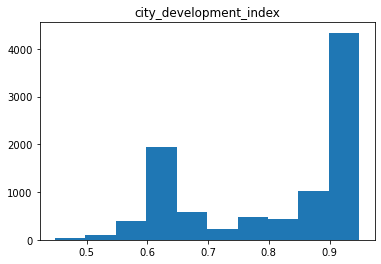

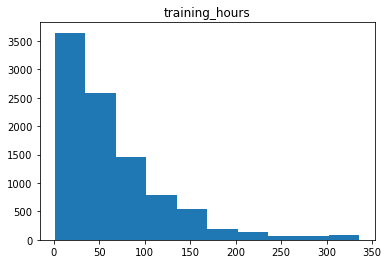

CATEGORICAL

gender {'Male': 8815, 'Female': 631, 'Other': 108} 

relevent_experience {'Has relevent experience': 6542, 'No relevent experience': 3012} 

enrolled_university {'no_enrollment': 6724, 'Full time course': 2239, 'Part time course': 591} 

education_level {'Graduate': 6236, 'Masters': 2059, 'High School': 946, 'Phd': 185, 'Primary School': 128} 

major_discipline {'STEM': 8632, 'Business Degree': 164, 'Arts': 129, 'Humanities': 321, 'No Major': 110, 'Other': 198} 

experience {'>20': 1434, '15': 310, '5': 758, '<1': 328, '11': 337, '13': 176, '7': 562, '17': 139, '2': 646, '16': 221, '1': 338, '4': 766, '10': 445, '14': 270, '18': 123, '19': 133, '12': 228, '3': 774, '6': 630, '9': 496, '8': 366, '20': 74} 

company_size {'50-99': 4965, '<10': 579, '10000+': 924, '5000-9999': 257, '1000-4999': 603, '10/49': 707, '100-500': 1122, '500-999': 397} 

company_type {'Pvt Ltd': 8066, 'Funded Startup': 445, 'Early Stage Startup': 284, 'Other': 57, 'Public Sector': 451, 'NGO': 251} 


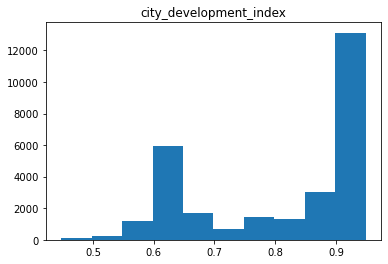

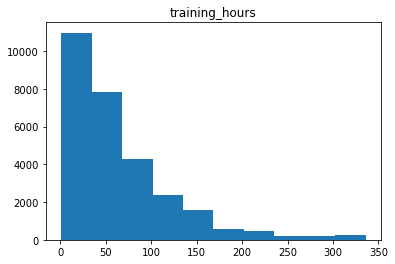

CATEGORICAL

gender {'Male': 26575, 'Female': 1895, 'Other': 292} 

relevent_experience {'Has relevent experience': 19752, 'No relevent experience': 9010} 

enrolled_university {'no_enrollment': 20327, 'Full time course': 6630, 'Part time course': 1805} 

education_level {'Graduate': 18793, 'Masters': 6239, 'High School': 2808, 'Phd': 532, 'Primary School': 390} 

major_discipline {'STEM': 26028, 'Business Degree': 501, 'Arts': 360, 'Humanities': 954, 'No Major': 334, 'Other': 585} 

experience {'>20': 4409, '15': 915, '5': 2260, '<1': 998, '11': 968, '13': 555, '7': 1636, '17': 456, '2': 1879, '16': 652, '1': 1015, '4': 2321, '10': 1401, '14': 803, '18': 368, '19': 411, '12': 679, '3': 2314, '6': 1907, '9': 1408, '8': 1193, '20': 214} 

company_size {'50-99': 14955, '<10': 1759, '10000+': 2794, '5000-9999': 770, '1000-4999': 1728, '10/49': 2164, '100-500': 3410, '500-999': 1182} 

company_type {'Pvt Ltd': 24320, 'Funded Startup': 1283, 'Early Stage Startup': 888, 'Other': 179, 'Public

In [27]:
build_distr(X_hr_under)
build_distr(X_hr_over)

При использовании Undersampling размер датасета уменьшился примерно в 2 раза, при использовании Oversampling увеличился примерно в 1.4 раза. Также заметно изменились некоторые относительные распределения. 